# Titanic: Einstieg in Machine Learning

![](titanic_main.png)

Dr. Kristian Rother

*Dieses Tutorial ist unter den Bedingungen der Creative Commons Attribution Share-alike License 4.0 verfügbar*

## Ziel

Wir möchten die Passagierdaten der Titanic verwenden, um vorherzusagen, ob ein Passagier die Reise überlebt.

## Teil 1: An Bord gehen

![](boarding.png)

### 1.1 Python-Bibliotheken importieren
Wir importieren einige Python-Bibliotheken

In [1]:
import pandas as pd  # Tabellen
import numpy as np   # Matrizen
import pylab as plt  # Plotten
import sklearn       # Scikit-Learn für maschinelles Lernen

In [2]:
%matplotlib inline

### 1.2. Passagierdaten laden

Verwende `pandas`, um die Datei `train.csv` einzulesen.

In [3]:
df = pd.read_csv("train806.csv")

Du findest den Datensatz auf [www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic).

### 1.3. Inspiziere die Daten

Zeige die Daten an und verschaffe Dir einen ersten Eindruck. Kläre, was die einzelnen Spalten bedeuten.

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


Zähle die Werte in einzelnen Spalten aus, etwa so:

In [5]:
df['Embarked'].value_counts()

S    586
C    149
Q     68
Name: Embarked, dtype: int64

Untersuche zwei weitere Spalten mit der Funktion `value_counts()`.

In [6]:
df['Sex'].value_counts()

male      526
female    279
Name: Sex, dtype: int64

In [7]:
df['Pclass'].value_counts()

3    448
1    192
2    165
Name: Pclass, dtype: int64

## Teil 2: So blau ist das Meer..

![](journey.png)

### 2.1 Zeichne ein Histogramm
Erstelle ein Histogramm, das das Alter der Passagiere zeigt.

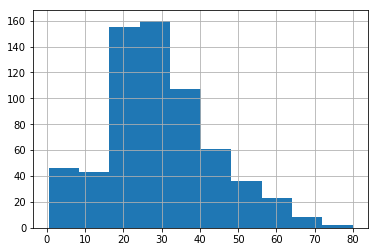

In [9]:
df['Age'].hist()

Ermittle die Altersverteilung für die Passagiere, die überlebt haben:

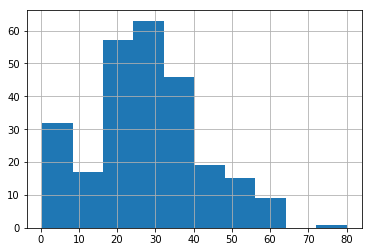

In [10]:
ueberlebende = df[df['Survived']==1]
ueberlebende['Age'].hist()

Überlebende Frauen

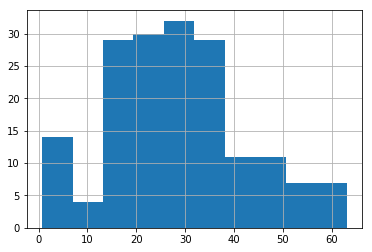

In [8]:
uef = ueberlebende[ueberlebende['Sex']=='female']
uef['Age'].hist()

Beide Gruppen in einem Histogramm

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

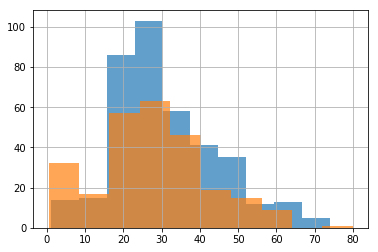

In [12]:
df.groupby('Survived')['Age'].hist(alpha=0.7)

### 2.2 Zeichne ein Balkendiagramm

Gruppiere die Passagiere nach Ticketklasse und Überleben:

In [20]:
g = df.groupby(['Survived', 'Pclass'])
g = g['Name'].count()
g

Survived  Pclass
0         1          73
          2          88
          3         337
1         1         119
          2          77
          3         111
Name: Name, dtype: int64

Gruppiere noch nach weiteren Kriterien. Kannst Du auch nach drei Spalten gruppieren?

In [21]:
g = g.unstack()
g

Pclass,1,2,3
Survived,,,
0,73,88,337
1,119,77,111


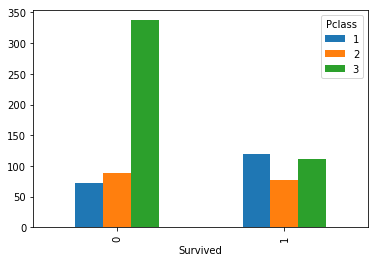

In [22]:
g.plot.bar()

### Abhängigkeit vom Geschlecht

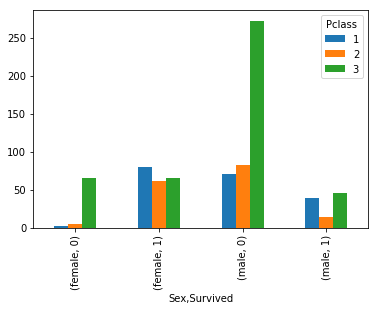

In [23]:
g = df.groupby(['Sex', 'Survived', 'Pclass'])
g = g['Name'].count()
g = g.unstack()
g.plot.bar()

In [24]:
g = df.groupby(['Sex', 'Survived'])
g = g['Name'].count()
g = g.unstack(0)
g

Sex,female,male
Survived,,
0,72,426
1,207,100


normierte Balken, so dass F/M insgesamt gleich hoch sind

In [25]:
anteilig = g / g.sum()
anteilig

Sex,female,male
Survived,,
0,0.258065,0.809886
1,0.741935,0.190114


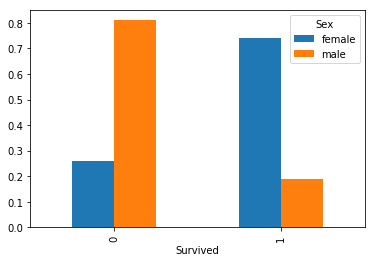

In [26]:
anteilig.plot.bar()

### 2.3 Hypothesen
Sammle Beobachtungen, welche **Merkmale** eines Passagiers für eine höhere Überlebenschance sprechen und welche dagegen.

## Teil 3: Kollisionskurs
![](titanic.png)

## 3.1 Datenklempnerei
Damit wir mit **Scikit-Learn** arbeiten können, müssen wir die Daten säubern und umgestalten.

Mit wie vielen Einträgen startest Du?

In [27]:
df.shape

(805, 12)

Entferne alle Spalten außer `"Pclass", "Age", "Sex" und "Survived"`.

In [28]:
clean_df = df[['Pclass', 'Age', 'Sex', 'Survived']]
clean_df

,Pclass,Age,Sex,Survived
0,3,22.0,male,0
1,1,38.0,female,1
2,3,26.0,female,1
3,1,35.0,female,1
4,3,35.0,male,0
5,3,NaN,male,0
6,3,2.0,male,0
7,3,27.0,female,1
8,2,14.0,female,1
9,3,4.0,female,1


In [29]:
clean_df['female'] = pd.get_dummies(clean_df['Sex'])['female']
clean_df

/home/krother/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Pclass,Age,Sex,Survived,female
0,3,22.0,male,0,0
1,1,38.0,female,1,1
2,3,26.0,female,1,1
3,1,35.0,female,1,1
4,3,35.0,male,0,0
5,3,NaN,male,0,0
6,3,2.0,male,0,0
7,3,27.0,female,1,1
8,2,14.0,female,1,1
9,3,4.0,female,1,1


Entferne alle Zeilen, die fehlende Werte enthalten

In [30]:
clean_df = clean_df.dropna()

Wandle zwei der **Eingabemerkmale** in eine Numpy-Matrix `X` um (Um 'Sex' kümmern wir uns später):

In [31]:
X = clean_df[['Pclass', 'Age', 'female']].values
X

array([[  3.,  22.,   0.],
       [  1.,  38.,   1.],
       [  3.,  26.,   1.],
       ..., 
       [  1.,  19.,   1.],
       [  1.,  26.,   0.],
       [  3.,  32.,   0.]])

In [32]:
X.shape

(641, 3)

Wandle die Spalte mit den **Zielwerten** in eine **eindimensionale** Numpy-Matrix `y` um:

In [33]:
y = clean_df[['Survived']].values.ravel()

Betrachte beide Matrizen. Wie groß sind sie jeweils?

In [34]:
y.shape

(641,)

### 3.2 Erstelle einen Trainings- und einen Testdatensatz

Teile die Daten in Trainings- und Testdaten auf. Dies geht natürlich nur, wenn `X` und `y` die gleiche Anzahl Zeilen haben.

In [35]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [36]:
Xtrain.shape

(480, 3)

### Frage

Wofür benötigen wir den Testdatensatz?

## Teil 4: Modellieren und Vorhersage
![](sinking.png)

### 4.1 Überwachte Lernmodelle
Informiere Dich über eines der folgenden Lernmodelle zur **Klassifikation** (auf Wikipedia und der Dokumentation zu Scikit-Learn):

* Logistische Regression
* Naive Bayes-Klassifikator
* Random Forest
* Support Vector Classifier (SVC)

Kläre folgende Fragen:
* Was ist die Grundidee des Verfahrens?
* Wie lässt sich das Modell in Scikit-Learn importieren?
* Welche Parameter kann man einstellen?

Passe den folgenden Code an:

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [38]:
m = LogisticRegression()
m.fit(Xtrain, ytrain)
print("training: {:5.3f}    test: {:5.3f}".format(m.score(Xtrain, ytrain), m.score(Xtest, ytest)))

training: 0.785    test: 0.832


In [39]:
m = GaussianNB()
m.fit(Xtrain, ytrain)
print("training: {:5.3f}    test: {:5.3f}".format(m.score(Xtrain, ytrain), m.score(Xtest, ytest)))

training: 0.775    test: 0.807


In [40]:
m = RandomForestClassifier()
m.fit(Xtrain, ytrain)
print("training: {:5.3f}    test: {:5.3f}".format(m.score(Xtrain, ytrain), m.score(Xtest, ytest)))

training: 0.885    test: 0.851


In [41]:
m = SVC()
m.fit(Xtrain, ytrain)
print("training: {:5.3f}    test: {:5.3f}".format(m.score(Xtrain, ytrain), m.score(Xtest, ytest)))

training: 0.854    test: 0.820


### 4.2 Evaluiere das Modell

Berechne die Genauigkeit des Modells für die Trainingsdaten:

In [42]:
m.score(Xtrain, ytrain)

0.85416666666666663

In [43]:
leo = np.array([[3, 22, 0]])
kate = np.array([[1, 25, 1]])

print(m.predict(leo))
print(m.predict(kate))

[0]
[1]


Ist dieser Wert aus Deiner Sicht gut oder schlecht? Wie gut würde ein zufallsbasierter Klassifikator abschneiden?

Zum Vergleich können wir auch noch eine **Konfusionsmatrix** berechnen:

In [44]:
from sklearn.metrics import confusion_matrix

ypred = m.predict(Xtrain)
confusion_matrix(ytrain, ypred)

array([[271,  17],
       [ 53, 139]])

### 4.3 Testdaten
Berechne nun die Genauigkeit für die Testdaten. Deute die Unterschiede. Ist der Wert gut oder schlecht?

### 4.4 Mehr Daten
Nun können wir mehr Daten verwenden. Damit wir das Geschlecht der Passagiere berücksichtigen können, müssen wir es in Zahlen umwandeln. Dazu verwenden wir **one-hot encoding**:

In [ ]:
gender = pd.get_dummies(clean_df['Sex'])
gender

Füge diese Daten als neue Spalte dem DataFrame hinzu.

In [45]:
# ab hier alles oben schon gemacht

Führe die Vorhersage mit den zusätzlichen Daten erneut durch.

### 4.5 Vergleich unterschiedlicher Modelle

Probiere die unterschiedlichen oben recherchierten Modelle aus. Welches schneidet am Besten ab?

### 4.6 Hyperparameter
Probiere einige der Hyperparameter der Modelle zu verändern. Wenn Du keinen Plan hast, was ein Hyperparameter ist oder Du nicht weißt, welche es gibt, verändere den Wert für `max_depth` beim **RandomForest**, z.B. `RandomForestClassifier(max_depth=2)`

Wie verändert sich die Vorhersagegüte?

## Teil 5: Vorhersage

### 5.1 Modellauswahl
Entscheide Dich für ein Modell, das Du verwenden möchtest.

### 5.2 Vorhersage
Erstelle einen Datensatz für zusätzliche Passagiere und sage vorher, ob sie überleben werden:

In [ ]:
leo = np.array([[22, 3, 0]])
kate = np.array([[25, 1, 1]])

print(m.predict(leo))
print(m.predict(kate))

### 5.3 Bugs!
Es gibt im obigen Code (mindestens) einen Fehler in der Definition der Daten. Kannst Du diesen finden und beheben?

### 5.4 Fehlerabschätzung
Lasse Dir vom Dozenten einen Satz Testdaten aushändigen, den dieser bis hier geheim halten konnte (falls er es geschafft hat, die Klappe zu halten). Berechne die Genauigkeit des Modells für diese Testdaten. Dies ist der endgültige geschätzte Fehler. 